In [1]:
import os
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotting.plots as myplot
from utils.read_eval import read_eval, get_recalls, merge_same_topic
from utils.parse_terrier_input import read_topics

tp = ['HP04', 'NP04', 'TD04']
models = ['SimpleTfIdf', 'TF_IDF' , 'BM25', 'PL2']
query_exp = ['','-q']
combinations = [comb for comb in itertools.product(tp, models, query_exp)]

topics = {}
qrels = {}
for topic in tp:
    topics[topic] = r"/Users/fferegrino/Documents/ae1/TopicsQrels/%s/topics" % topic
    qrels[topic] = r"/Users/fferegrino/Documents/ae1/TopicsQrels/%s/qrels" % topic

dataframes_path= "results"

In [2]:
aggregates = {}
per_query = {}
for topic in tp:
    aggregates[topic] = {}
    per_query[topic] = {}
    for model in models:
        
        tot = pd.read_csv(os.path.join(dataframes_path, "total_%s_%s.csv" %(topic, model)), 
                          index_col=0)
        pq = pd.read_csv(os.path.join(dataframes_path, "per_query_%s_%s.csv" %(topic, model)), 
                         index_col=0)
        """
        tot['model'] = model
        tot['topic'] = topic
        
        pq['model'] = model
        pq['topic'] = topic
        
        pq.set_index(['topic', 'model', 'query'], inplace = True)
        pq.sort_index(inplace=True)
        
        tot.set_index(['topic', 'model'], inplace = True)
        tot.sort_index(inplace=True)
        """;
        aggregates[topic][model] = tot
        per_query[topic][model] = pq
        

## Interpretation of results  

 - **P_X**: Precision after X docs retrieved
 - **Rprec**: R-Precision (Precision after R (= num-rel for topic) documents retrieved)
 - **bpref**: Binary Preference, top R judged nonrel
 - **iprec_at_recall_X.XX**: Interpolated Recall - Precision Averages at X.XX recall
 - **map**: Mean Average Precision (MAP)
 - **num_rel**: Total number of relevant documents over all queries
 - **num_rel_ret**: Total number of relevant documents retrieved over all queries
 - **num_ret**: Total number of documents retrieved over all queries
 - **recip_rank**: Reciprocal rank of top relevant document
 - **gm_ap**: Average Precision. Geometric Mean, q_score=log(MAX(map,.00001))

## Homepage finding (HP04)

The user's aim is to find the homepage of a given entity (person, organisation, etc) - e.g.  ‘University of Glasgow ’, and the **system should return the URL of that site’s homepage at (or near) rank one**.

In [13]:
topic = 'HP04'
topic_title = 'Homepage finding (HP04)'
queries = read_topics(topics[topic])
p_q = per_query[topic]
agg = aggregates[topic]

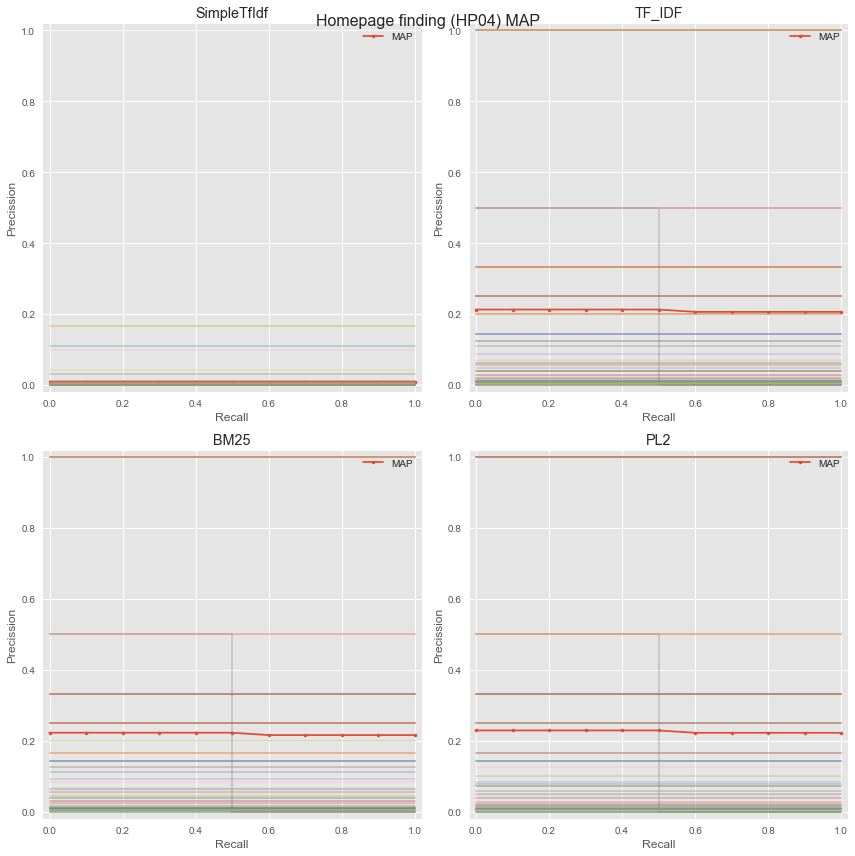

In [14]:
# Plot MAP
plt.figure(figsize=(12,12))
plt.suptitle(topic_title + " MAP", fontsize=16)
for i, model in enumerate(models):
    pq = p_q[model]
    total = agg[model]
    myplot.plot_recall_at(total, pq, i + 1, model)
plt.tight_layout()
plt.show();

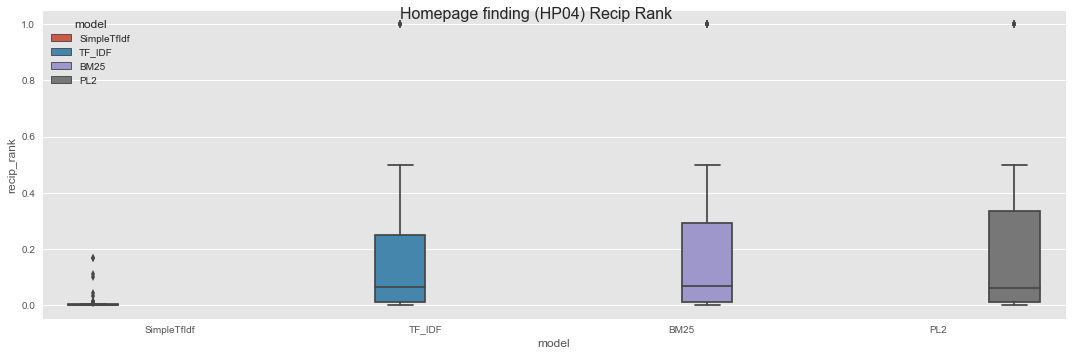

In [16]:
# Reciprocal rank
plt.figure(figsize=(15,5))
plt.suptitle(topic_title + " Recip Rank", fontsize=16)

df = merge_same_topic([p_q[model] for model in models], models)
sns.boxplot(y='recip_rank',x='model', hue='model',data=df)
plt.tight_layout()
plt.show()

In [29]:
by_model = df.groupby('model').mean()
print(by_model.loc['TF_IDF'].head())
print(agg['TF_IDF'].loc['all'].head())

P_10      0.046667
P_100     0.008533
P_1000    0.001040
P_15      0.032905
P_20      0.026667
Name: TF_IDF, dtype: float64
P_10      0.0467
P_100     0.0085
P_1000     0.001
P_15      0.0329
P_20      0.0267
Name: all, dtype: object


## Named page finding (NP04)

The user aims to find a particular webpage/document - e.g. 'Uk Tax return form’, and **the system should return the URL of that page at (or near) rank one**.

In [6]:
topic = 'NP04'
queries = read_topics(topics[topic])
p_q = per_query[topic]
agg = aggregates[topic]

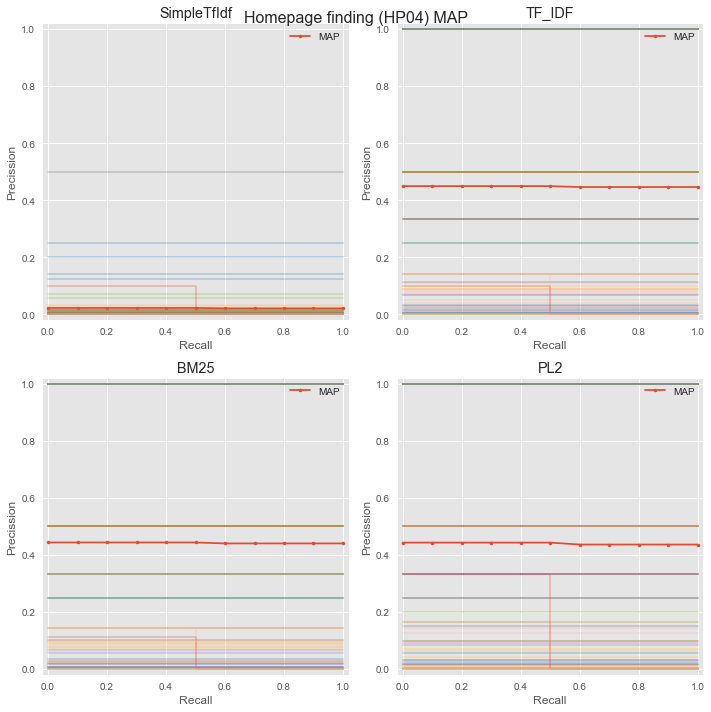

In [7]:
# Plot MAP
plt.figure(figsize=(10,10))
plt.suptitle(topic_title + " MAP", fontsize=16)
for i, model in enumerate(models):
    pq = p_q[model]
    total = agg[model]
    myplot.plot_recall_at(total, pq, i + 1, model)
plt.tight_layout()
plt.show();

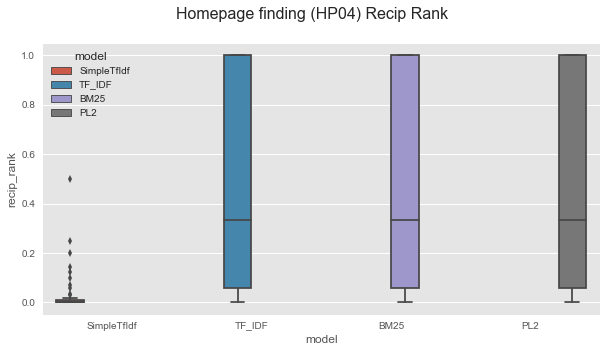

In [8]:
# Reciprical rank
plt.figure(figsize=(10,5))
plt.suptitle(topic_title + " Recip Rank", fontsize=16)

df = merge_same_topic([p_q[model] for model in models], models)
sns.boxplot(y='recip_rank',x='model', hue='model',data=df)
plt.show()

## Topic distillation  (TD04)

The user aims to find **as many relevant webpages as possible about a general topic**. - e.g.    ‘electoral  college’,  the  system  should  return and rank highly as many relevant webpages about the topic as possible. Each topic might have many relevant documents (similar to an adhoc search task).

In [9]:
topic = 'TD04'
queries = read_topics(topics[topic])
p_q = per_query[topic]
agg = aggregates[topic]

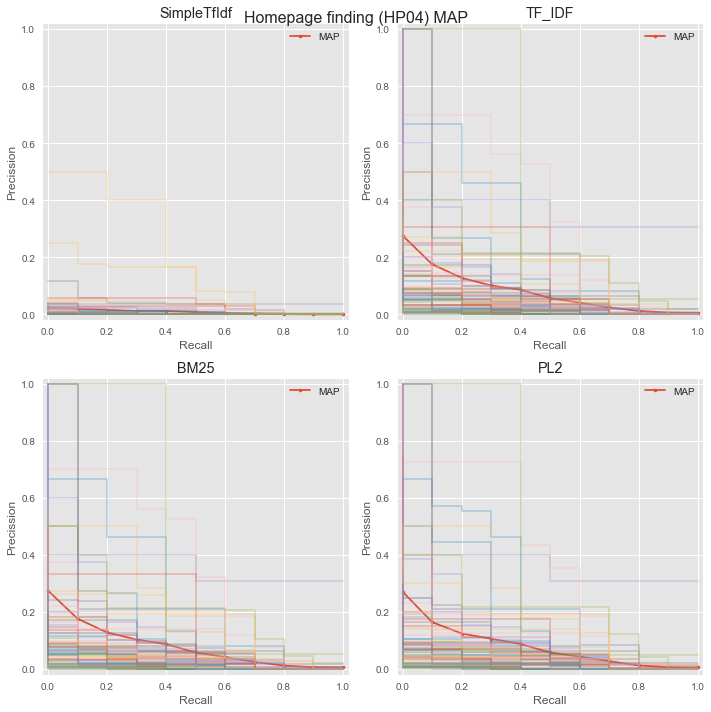

In [10]:
# Plot MAP
plt.figure(figsize=(10,10))
plt.suptitle(topic_title + " MAP", fontsize=16)
for i, model in enumerate(models):
    pq = p_q[model]
    total = agg[model]
    myplot.plot_recall_at(total, pq, i + 1, model)
plt.tight_layout()
plt.show();

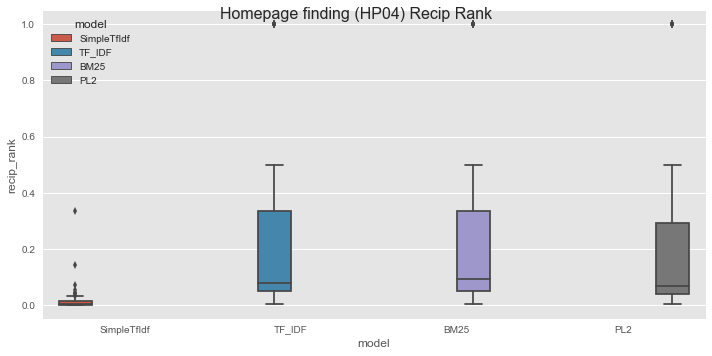

In [11]:
# Reciprocal rank
plt.figure(figsize=(10,5))
plt.suptitle(topic_title + " Recip Rank", fontsize=16)

df = merge_same_topic([p_q[model] for model in models], models)
sns.boxplot(y='recip_rank',x='model', hue='model',data=df)
plt.tight_layout()
plt.show()